In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

dataset https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [3]:
df = pd.read_csv('data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.isnull().sum() # print the sum of null values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Since there is no ‘Null’ value, therefore we need not to drop anything.

Next, our aim is to find the buying-patterns of the customers, therefore we do not need the columns ‘Channel’ and ‘Region’ for this analysis. Hence we will drop these two columns

In [5]:
df = df.drop(labels=['Channel', 'Region'], axis=1)

In [6]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### Clustering using KMean

In [7]:
#preprocessing
T = preprocessing.Normalizer().fit_transform(df)

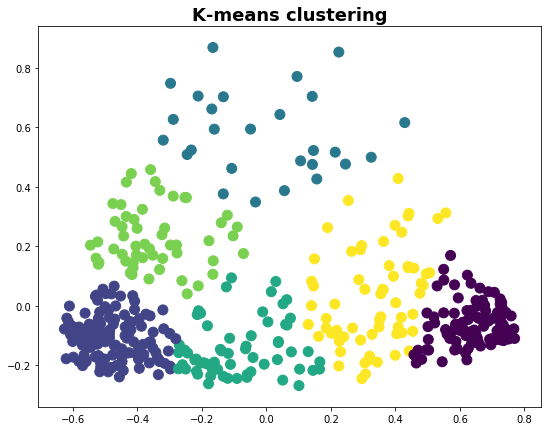

In [23]:
#number of clusters
kmean_model = KMeans(n_clusters=6)
kmean_model = kmean_model.fit_predict(T)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('K-means clustering', fontsize=18, fontweight='demi')
plt.scatter(T[:, 0], T[:, 1], c=kmean_model, s=100)


In [9]:
centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_
centroids, labels

(array([[0.95452165, 0.12626136, 0.16517109, 0.11906859, 0.03090797,
         0.05998253],
        [0.16494061, 0.42169156, 0.77848814, 0.07667063, 0.32901397,
         0.07048522],
        [0.70416878, 0.33372401, 0.5134971 , 0.09440153, 0.17850685,
         0.10100062],
        [0.42303472, 0.18455606, 0.34478159, 0.75343783, 0.05350116,
         0.08201898],
        [0.81285772, 0.20380729, 0.2045692 , 0.44864104, 0.03739865,
         0.08314326],
        [0.29049853, 0.70932465, 0.46307905, 0.1714735 , 0.11782205,
         0.19145319]]),
 array([2, 5, 5, 4, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 1, 5, 2, 2, 0, 4,
        0, 5, 2, 2, 0, 0, 1, 0, 2, 5, 0, 0, 5, 1, 0, 2, 1, 0, 4, 0, 2, 1,
        2, 5, 1, 5, 2, 1, 4, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 4, 1,
        1, 2, 5, 0, 4, 2, 3, 4, 2, 0, 3, 1, 0, 5, 0, 1, 2, 0, 2, 1, 5, 0,
        3, 0, 0, 4, 1, 3, 5, 1, 1, 3, 3, 4, 2, 1, 1, 0, 0, 0, 1, 1, 5, 1,
        0, 2, 4, 0, 0, 0, 0, 2, 0, 4, 0, 4, 0, 2, 0, 0, 4, 2, 5, 0, 4, 0,
        

In [10]:
# Dimesionality reduction to 2
pca_model = PCA(n_components=2)
pca_model.fit(T) # fit the model
T = pca_model.transform(T) # transform the 'normalized model'
# transform the 'centroids of KMean'
centroid_pca = pca_model.transform(centroids)
# print(centroid_pca)

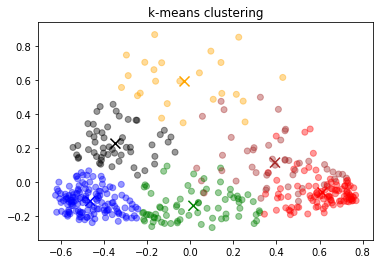

In [12]:
# colors for plotting
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[labels[i]] for i in range(len(T)) ]

# plot the PCA components
plt.scatter(T[:, 0], T[:, 1],
            c=features_colors, marker='o',
            alpha=0.4
        )

# plot the centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors
        )

# store the values of PCA component in variable: for easy writing
xvector = pca_model.components_[0] * max(T[:,0])
yvector = pca_model.components_[1] * max(T[:,1])
columns = df.columns
plt.title("k-means clustering")
# plot the 'name of individual features' along with vector length
# for i in range(len(columns)):
#     # plot arrows
#     plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75
#             )
#     # plot name of features
#     plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.show()

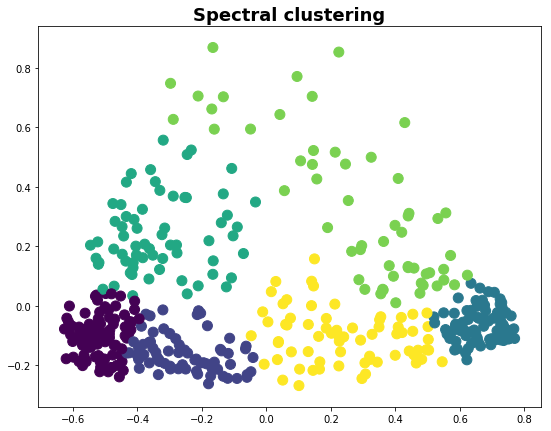

In [13]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=6, affinity='nearest_neighbors')

labelsS = model.fit_predict(T)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral clustering', fontsize=18, fontweight='demi')
plt.scatter(T[:, 0], T[:, 1], c=labelsS, s=100)


In [ ]:
# Visualising the clusters
plt.scatter(x[labelsS == 0, 0], x[labelsS == 0, 1], s = 50, c = 'blue')
plt.scatter(x[labelsS == 1, 0], x[labelsS == 1, 1], s = 50, c = 'orange')
plt.scatter(x[labelsS == 2, 0], x[labelsS == 2, 1], s = 50, c = 'red')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.title("Spectral clustering")
# plt.legend()

In [14]:
affinity_matrix, labels = model.affinity_matrix_, kmean_model.labels_
centroids, labels

(array([[0.95452165, 0.12626136, 0.16517109, 0.11906859, 0.03090797,
         0.05998253],
        [0.16494061, 0.42169156, 0.77848814, 0.07667063, 0.32901397,
         0.07048522],
        [0.70416878, 0.33372401, 0.5134971 , 0.09440153, 0.17850685,
         0.10100062],
        [0.42303472, 0.18455606, 0.34478159, 0.75343783, 0.05350116,
         0.08201898],
        [0.81285772, 0.20380729, 0.2045692 , 0.44864104, 0.03739865,
         0.08314326],
        [0.29049853, 0.70932465, 0.46307905, 0.1714735 , 0.11782205,
         0.19145319]]),
 array([2, 5, 5, 4, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 1, 5, 2, 2, 0, 4,
        0, 5, 2, 2, 0, 0, 1, 0, 2, 5, 0, 0, 5, 1, 0, 2, 1, 0, 4, 0, 2, 1,
        2, 5, 1, 5, 2, 1, 4, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 4, 1,
        1, 2, 5, 0, 4, 2, 3, 4, 2, 0, 3, 1, 0, 5, 0, 1, 2, 0, 2, 1, 5, 0,
        3, 0, 0, 4, 1, 3, 5, 1, 1, 3, 3, 4, 2, 1, 1, 0, 0, 0, 1, 1, 5, 1,
        0, 2, 4, 0, 0, 0, 0, 2, 0, 4, 0, 4, 0, 2, 0, 0, 4, 2, 5, 0, 4, 0,
        